In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func
import seaborn as sns
import plots

from func import ThreeD1, RMSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 

In [18]:
#df = pd.read_excel('cec_clay_susc.xlsx')[:56]
df = pd.read_excel('cec_clay_susc.xlsx')[:56]

df.describe()

,NUMBER,Duration,Depth,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,...,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.0,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,128.500000,361.190357,84.607143,0.000187,0.000008,1.780714,14.892857,443.767857,3.035714,0.000176,5.588430e-07,1.749464,13.055866,12.268793,0.787073,11.201550,0.787073,8.147736e+05,0.0,3376.150357,0.0,104966.773571,0.0,5.670000,1.382143,336.833571,2.826607,87.617857,1.50750,0.0,2.999107,52.193750,1.420357,4.658571,1.296607,14.559643,2.105179,0.0,3.128036,0.0,1.689643,7.546607,2.072143,0.079464,4.018214,34.129643,3.471429,0.0,16.186429,9.710179,...,0.523750,6.281964,0.738214,3.623214,0.646429,5.319286,506493.865714,1098.384464,7.329107,1.080357,3.212679,1.823750,0.0,1.5,0.0,1.5,0.0,1.5,55537.975536,1153.834286,230.206786,217.406964,380735.293571,1048.967857,5.42250,18.371250,1782.683929,1327.247143,6.855536,14.501250,0.796964,8.866429,0.0,19.163750,21.017857,1.562768,84.357143,6.228750,1.217179,7.252679,10.019757,16.053225,11.990200,22.021878,34.012078,36.439467,13.495230,49.934697,1.149821,3.223214
std,129.429517,0.740427,60.721923,0.000231,0.000008,6.280166,1.489297,205.886022,0.187256,0.000218,1.932940e-06,3.690164,16.135496,15.226438,0.983274,23.068675,0.983274,1.395492e+05,0.0,2442.210344,0.0,37035.560062,0.0,2.773215,0.127089,155.551836,0.701866,55.872667,0.49634,0.0,0.540708,24.564462,0.355374,2.843824,0.144829,9.187658,0.338639,0.0,0.227104,0.0,0.131508,6.452734,0.359043,0.594656,0.350335,36.843258,0.763653,0.0,1.292301,9.846063,...,1.950608,0.884304,1.539733,0.982307,1.894977,1.595178,27814.679966,74.493896,4.388561,0.185295,3.179280,0.326438,0.0,0.0,0.0,0.0,0.0,0.0,19595.534544,241.890321,468.180725,309.021511,65209.886639,56.098186,31.26507,2.523047,1683.146872,509.753206,14.302167,10.719625,3.467316,0.881541,0.0,1.076521,18.076093,0.164355,60.796659,8.744001,1.745994,1.141327,9.638780,12.345434,8.709091,16.444529,23.756624,21.489171,21.056768,32.053798,1.127749,5.161677
min,1.000000,360.010000,4.000000,0.000003,-0.000002,-37.920000,11.980000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,0.160813,0.080649,0.011962,2.977099,0.011962,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.110000,0.69000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,0.000000,...,0.000000,3.250000,0.000000,1.740000,0.000000,1.800000,465954.720000,904.680000,0.000000,1.000000,0.000000,1.500000,0.0,1.5,0.0,1.5,0.0,1.5,1612

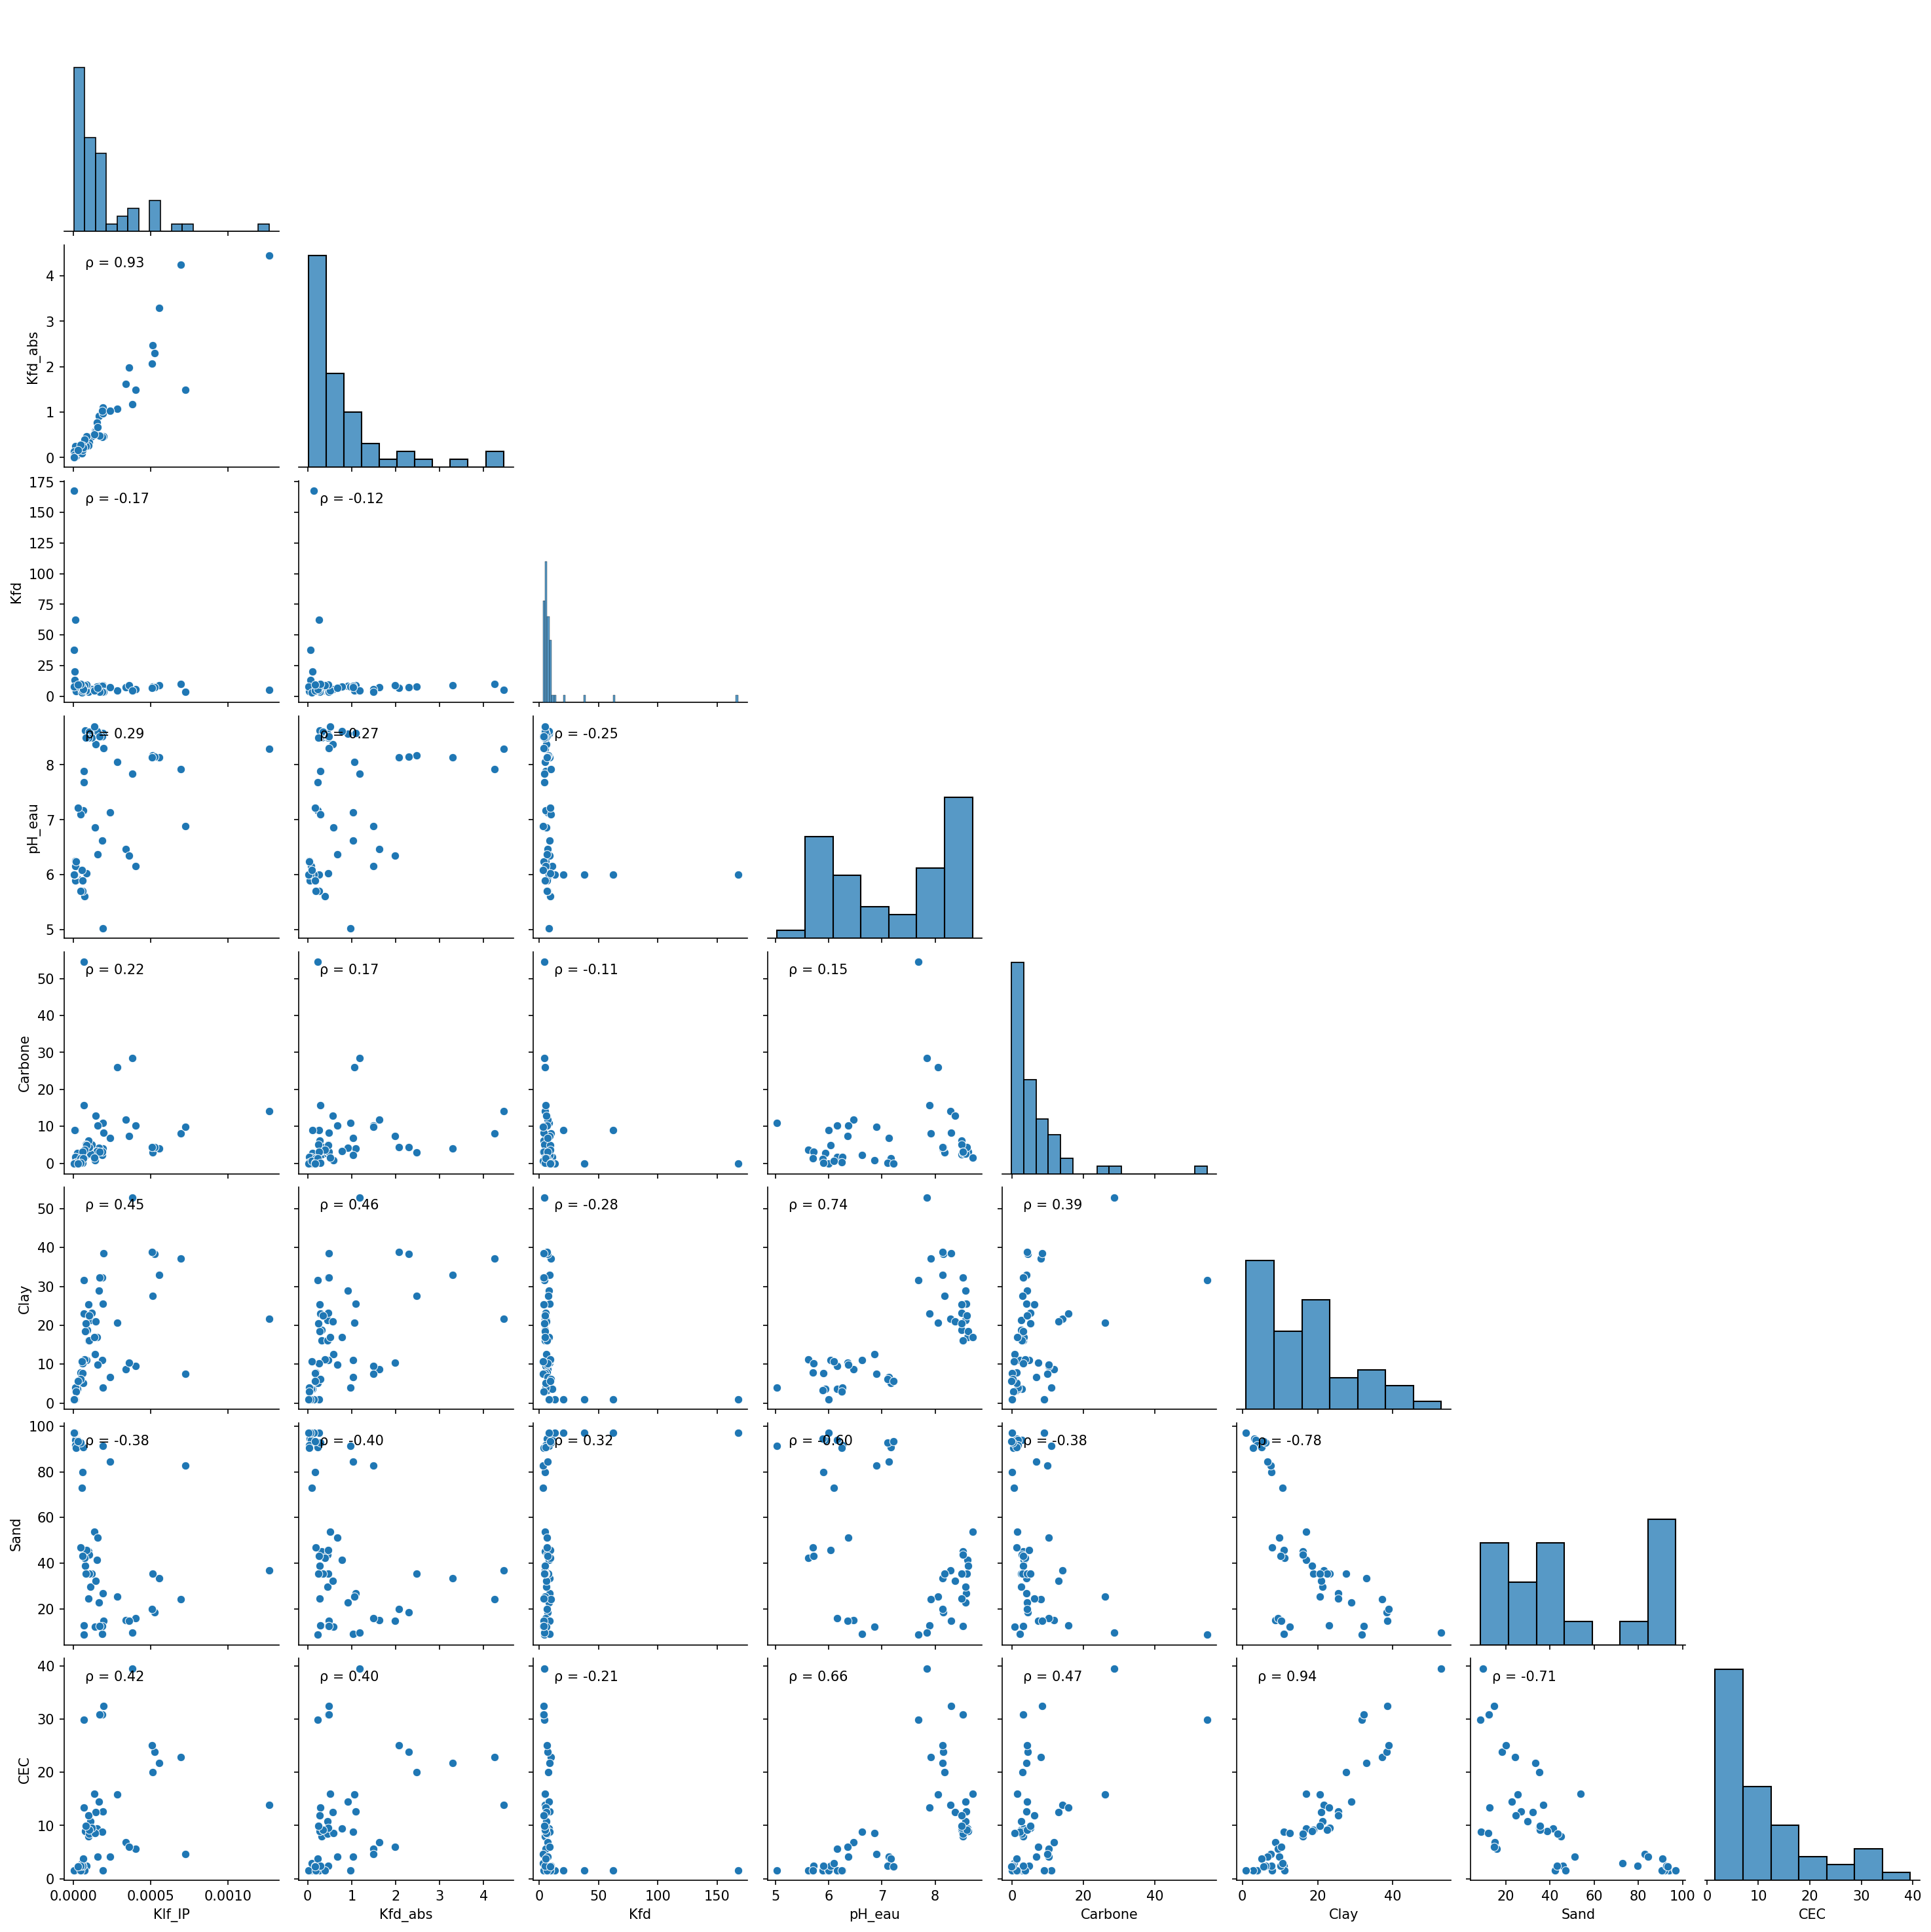

In [19]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'Kfd_abs', 'Kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)

g.map_lower(func.corrfunc)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


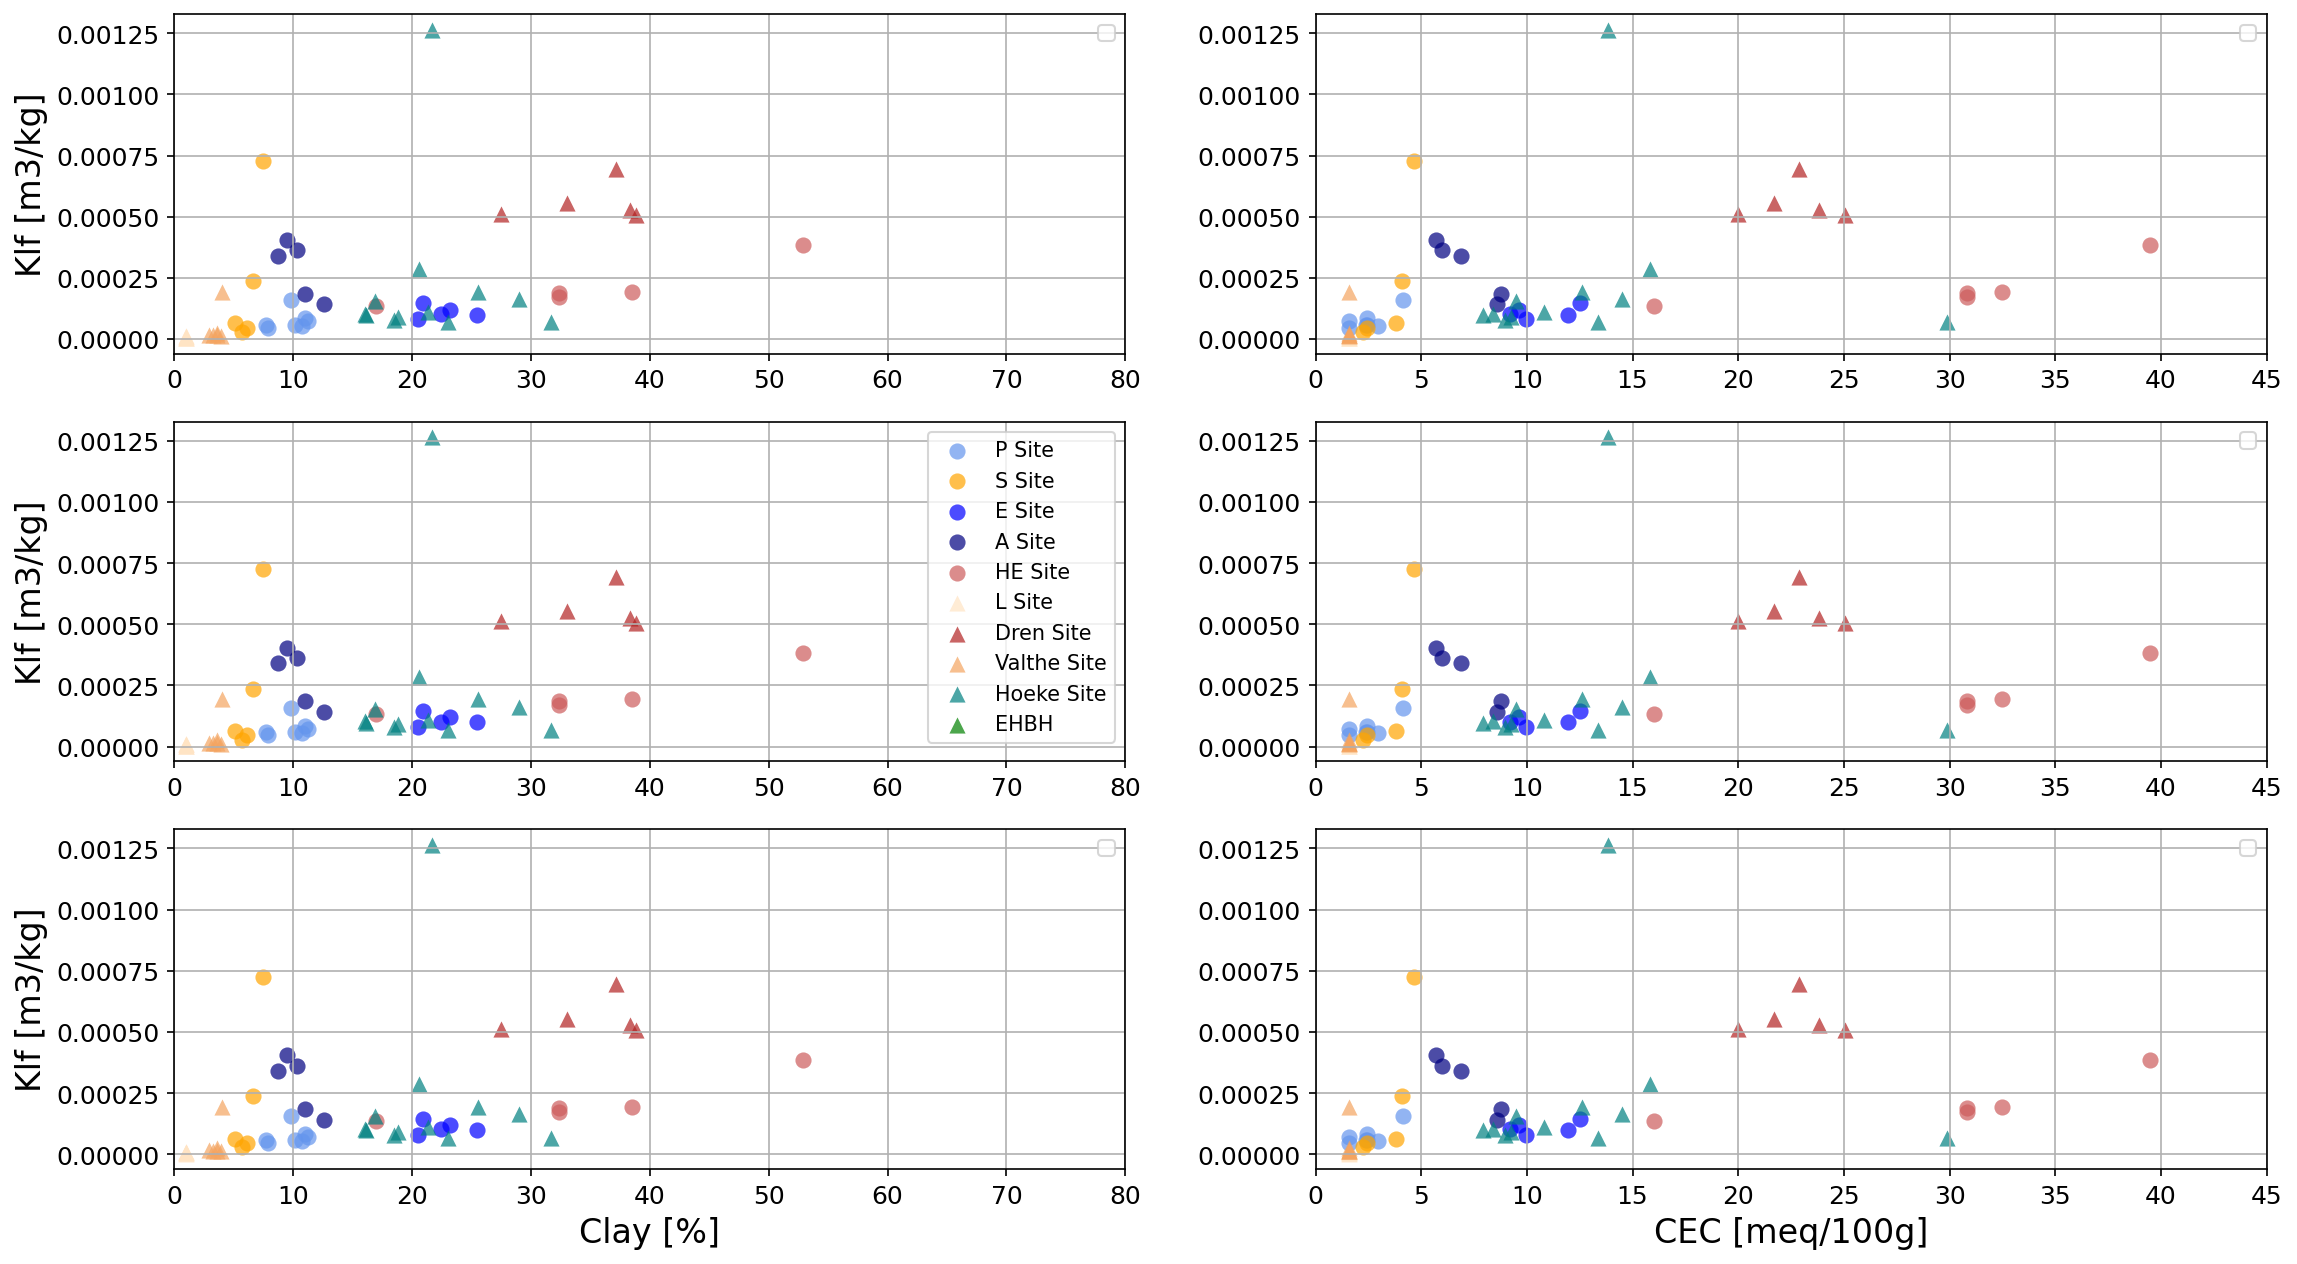

In [20]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))
aa = 0.7
ss = 60
lw = 0
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black", label = 'Angola')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue", label = 'P Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange", label = 'S Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue", label = 'E Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy", label = 'A Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred", label = 'HE Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque", label = 'L Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick", label = 'Dren Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown", label = 'Valthe Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal", label = 'Hoeke Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green", label = 'EHBH')

#ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Klf_IP[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw, c = "black")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Klf_IP[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Klf_IP[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Klf_IP[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Klf_IP[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Klf_IP[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Klf_IP[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Klf_IP[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Klf_IP[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Klf_IP[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Klf_IP[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, linewidth=lw, marker = "^", c = "green")

plots.plot1(ax1, ax2, ax3, ax4, ax5, ax6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


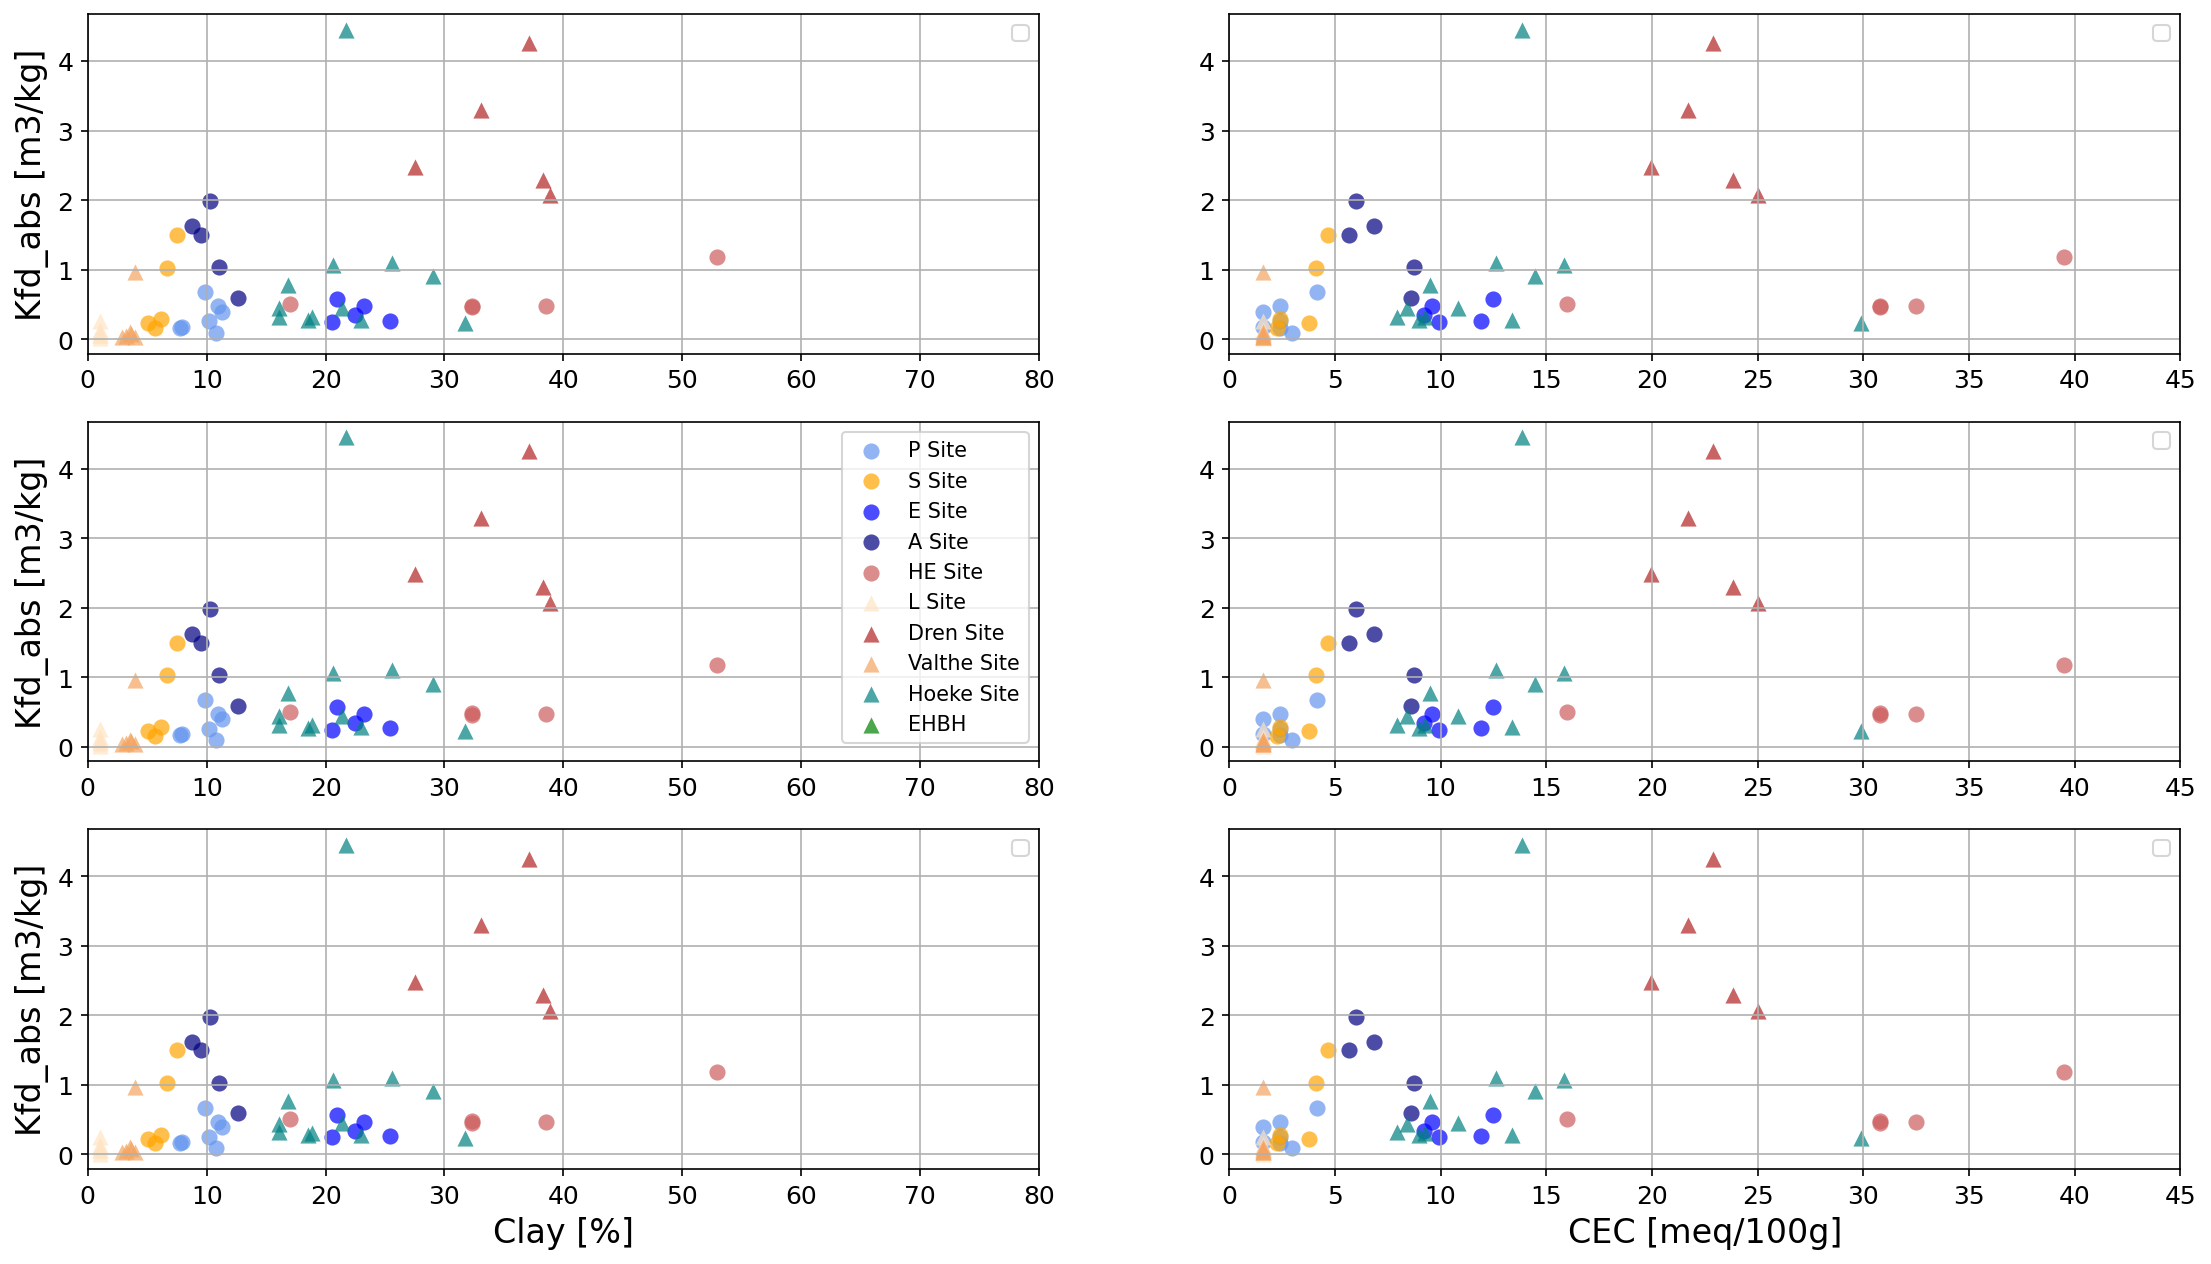

In [21]:
fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))
aa = 0.7
ss = 60
lw = 0
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black", label = 'Angola')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue", label = 'P Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange", label = 'S Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue", label = 'E Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy", label = 'A Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred", label = 'HE Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque", label = 'L Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick", label = 'Dren Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown", label = 'Valthe Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal", label = 'Hoeke Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green", label = 'EHBH')

#ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd_abs[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw, c = "black")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd_abs[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd_abs[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd_abs[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd_abs[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd_abs[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd_abs[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd_abs[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd_abs[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, linewidth=lw, marker = "^", c = "green")

plots.plot2(ax1, ax2, ax3, ax4, ax5, ax6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


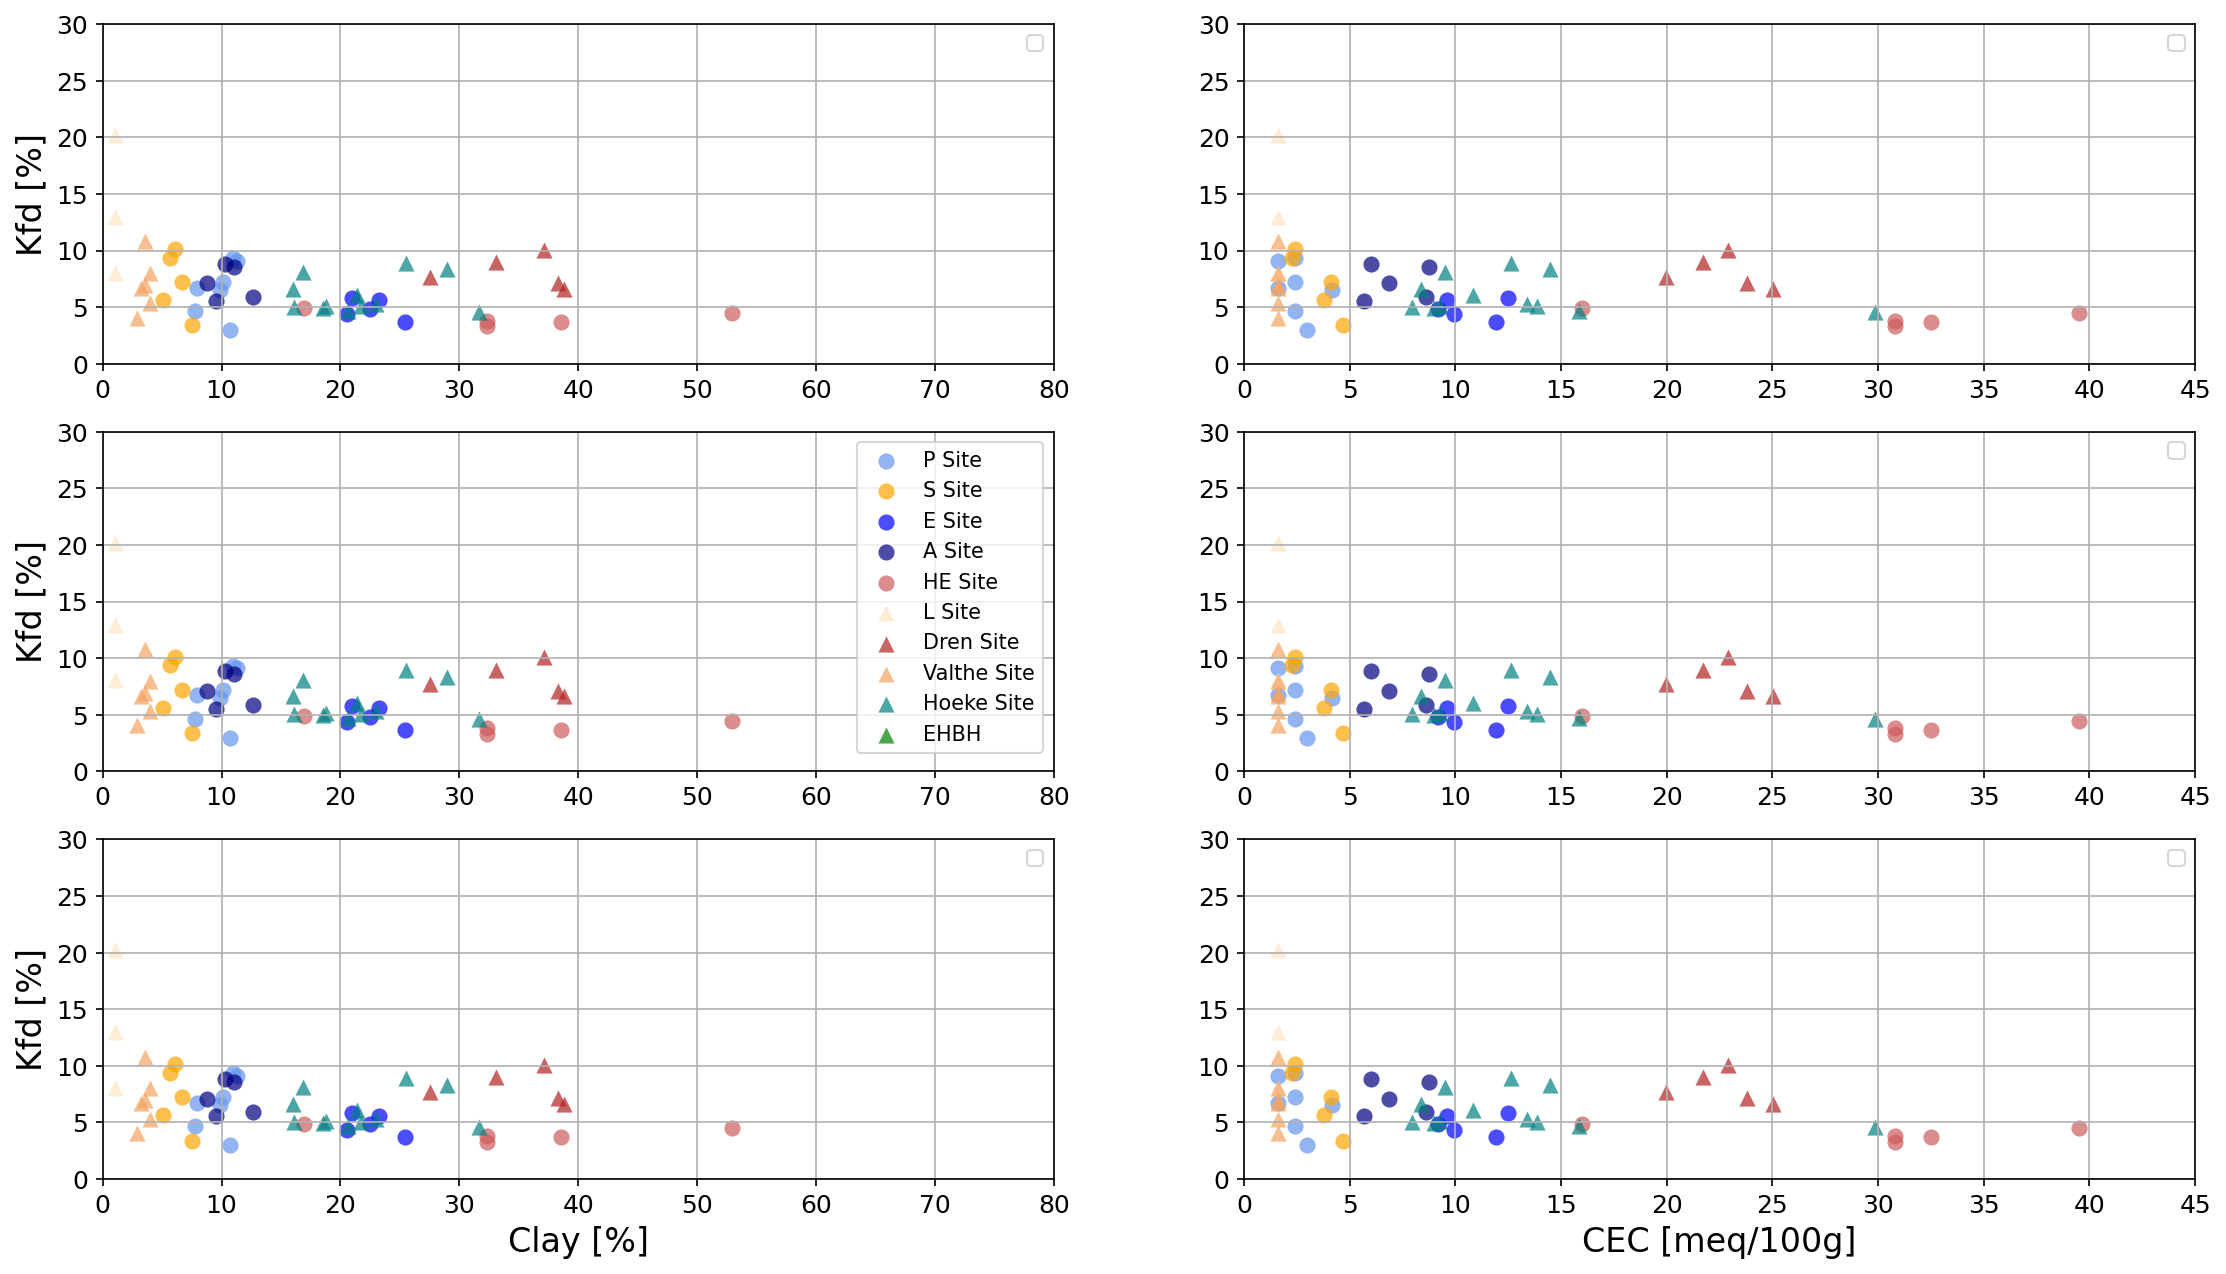

In [22]:
fig3, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))
aa = 0.7
ss = 60
lw = 0
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax2.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black", label = 'Angola')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue", label = 'P Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange", label = 'S Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue", label = 'E Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy", label = 'A Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred", label = 'HE Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque", label = 'L Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick", label = 'Dren Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown", label = 'Valthe Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal", label = 'Hoeke Site')
ax3.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green", label = 'EHBH')

#ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
ax4.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw,c = "black")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax5.scatter(df.Clay[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "green")

#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("AN")], df.Kfd[df['SAMPLE'].str.startswith("AN")], alpha = aa, s=ss, linewidth=lw, c = "black")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("P")], df.Kfd[df['SAMPLE'].str.startswith("P")], alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("S")], df.Kfd[df['SAMPLE'].str.startswith("S")], alpha = aa, s=ss, linewidth=lw, c = "orange")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Ea")], df.Kfd[df['SAMPLE'].str.startswith("Ea")], alpha = aa, s=ss, linewidth=lw, c = "blue")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("Aa")], df.Kfd[df['SAMPLE'].str.startswith("Aa")], alpha = aa, s=ss, linewidth=lw,c = "navy")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HE")], df.Kfd[df['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("L")], df.Kfd[df['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "bisque")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("D")], df.Kfd[df['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "firebrick")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("V")], df.Kfd[df['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "sandybrown")
ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("HOEKE")], df.Kfd[df['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, marker = "^", linewidth=lw,c = "teal")
#ax6.scatter(df.CEC[df['SAMPLE'].str.startswith("EHBH")], df.Kfd[df['SAMPLE'].str.startswith("EHBH")], alpha = aa, s=ss, linewidth=lw, marker = "^", c = "green")

plots.plot3(ax1, ax2, ax3, ax4, ax5, ax6)

## Modelling CEC vs F1mass


3.3683410907095754
0.8756592924696405
coefficients of equation of plane, (a1, a2):  [0.73]
value of intercept, c: -1.708826935406151
3.368084782947705
0.8756782147076639
coefficients of equation of plane, (a1, a2):  [   0.73 -203.6 ]
value of intercept, c: -1.6982355206064046
3.368084782947705
0.8756782147076639
coefficients of equation of plane, (a1, a2):  [   0.73 -203.6 ]
value of intercept, c: -1.6982355206064046
3.368173548700567
0.8756716616289856
coefficients of equation of plane, (a1, a2):  [0.73 0.  ]
value of intercept, c: -1.7169343223371172
3.3548831556839263
0.8766508940992156
coefficients of equation of plane, (a1, a2):  [ 0.74 -0.35]
value of intercept, c: -1.6406477627232032


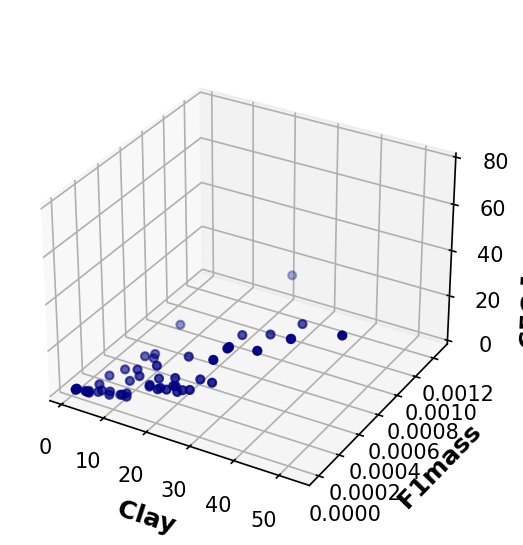

In [23]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")
ThreeD1(axa, plt)

s_array_2 = df[['Clay', 'Klf_IP']].to_numpy()
s_array_1 = df[['Clay']].to_numpy()
s_array_4 = df[['Clay', 'Xhf_IP']].to_numpy()
s_array_3 = df[['Clay', 'Klf_IP']].to_numpy()
s_array_5 = df[['Clay', 'Kfd_abs']].to_numpy()

reg = LinearRegression().fit(s_array_1, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_1) - df.CEC)**2)))
print(reg.score(s_array_1, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_2, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_2) - df.CEC)**2)))
print(reg.score(s_array_2, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_3, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_3) - df.CEC)**2)))
print(reg.score(s_array_3, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_4, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_4) - df.CEC)**2)))
print(reg.score(s_array_4, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


reg = LinearRegression().fit(s_array_5, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_5) - df.CEC)**2)))
print(reg.score(s_array_5, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cec = np.linspace(0, 80, 80)
clay_ = np.linspace(0, 60, 100)
Klf_IP_ = np.linspace(0, 20, 36000)


#cec_banin_amiel = ptf.Banin_Amiel3(X, Y)
#print(cec_banin_amiel)

#cec_IOPped = ptf.IOPped(X, Y)
#print(cec_IOPped)

axa.scatter(df.Clay, df.Klf_IP, df.CEC,  c = "navy", s = 15)
#axa.plot_surface(X, Y, cec_banin_amiel)
#axa.plot_surface(X, Y, cec_IOPped)

In [30]:
df['Clay_Klf_IP'] = df.Clay*df.Klf_IP
df['Clay_Klf_IP2'] = df.Clay*df.Klf_IP**2
df['Clay2_Klf_IP'] = (df.Clay**2)*df.Klf_IP
df['Clay2'] = df.Clay**2
df['Klf_IP'] = df.Klf_IP**2

#X = df[['Clay', 'Klf_IP', 'Clay_Klf_IP', 'Clay_Klf_IP2', 'Clay2_Klf_IP', 'Clay2', 'Klf_IP2']].values
X = df[['Clay', 'Klf_IP']].values

Y = df.CEC.values

RMSE_train_lin, RMSE_test_lin, R2_train_lin, R2_test_lin = [], [], [], []
for i in range(1000):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)
    
    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_test = LinReg.score(X_test, y_test) # Test set R²
    R2_train_lin.append(R_train)
    R2_test_lin.append(R_test)
    
#    print('Training set RMSE: {}'.format(RMSE_train))
#    print('Test set RMSE: {}'.format(RMSE_test))
#    print('Train set R²: {}'.format(R_train))
#    print('Test set R²: {}'.format(R_test))
print(np.mean(R2_test_lin), np.mean(R2_train_lin)) 

0.8412311003721877 0.8751122599225407


In [25]:

def train_model_and_evaluate(features, target, runs, rmse_func):
    test_errors = []
    train_errors = []
    
    for _ in range(runs):
        r_train_lin, r_test_lin = [], []
        
        x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)
        
        lin_reg = LinearRegression()
        lin_reg.fit(x_train, y_train)
        
        y_hat_train = lin_reg.predict(x_train)
        rmse_train = rmse_func(y_train, y_hat_train)
        
        y_hat_test = lin_reg.predict(x_test)
        rmse_test = rmse_func(y_test, y_hat_test)
        
        r_train_lin.append(lin_reg.score(x_train, y_train))
        r_test_lin.append(lin_reg.score(x_test, y_test))
        
        test_errors.append(np.mean(r_test_lin))
        train_errors.append(np.mean(r_train_lin))
    
    return test_errors, train_errors


# Assuming df and func.RMSE() are defined elsewhere in your code.
x = df[['Clay']].values
y = df['Klf_IP'].values
runs = 1000  # or any other desired number of runs

feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['CEC', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'Humus']
]

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    test_errors, train_errors = train_model_and_evaluate(x, y, runs, func.RMSE)
    
    test_errors_summary.append(np.mean(test_errors))
    train_errors_summary.append(np.mean(train_errors))

print('Errors for feature sets:', test_errors_summary)

# [0.7682385669171589, 0.8049769679677737, 0.764180398556719, 0.8167862190868573, 0.813522773043662]
# [0.8078190849791886, 0.8402467164297608, 0.8006912253127838, 0.7952478094245723, 0.6931044773152953]
# [0.7930888633183476, 0.8310422638065256, 0.7867607689293337, 0.7505139952391313, 0.6276777498099569]
# 1000 [0.796, 0.834, 0.791, 0.787, 0.729]
# 1000 [0.796, 0.834, 0.791, 0.744, 0.624]


Errors for feature sets: [-0.018073832292254455, -0.017844794824523506, -0.026380301657822573, -0.016963577206836392, -0.02483046465865457]


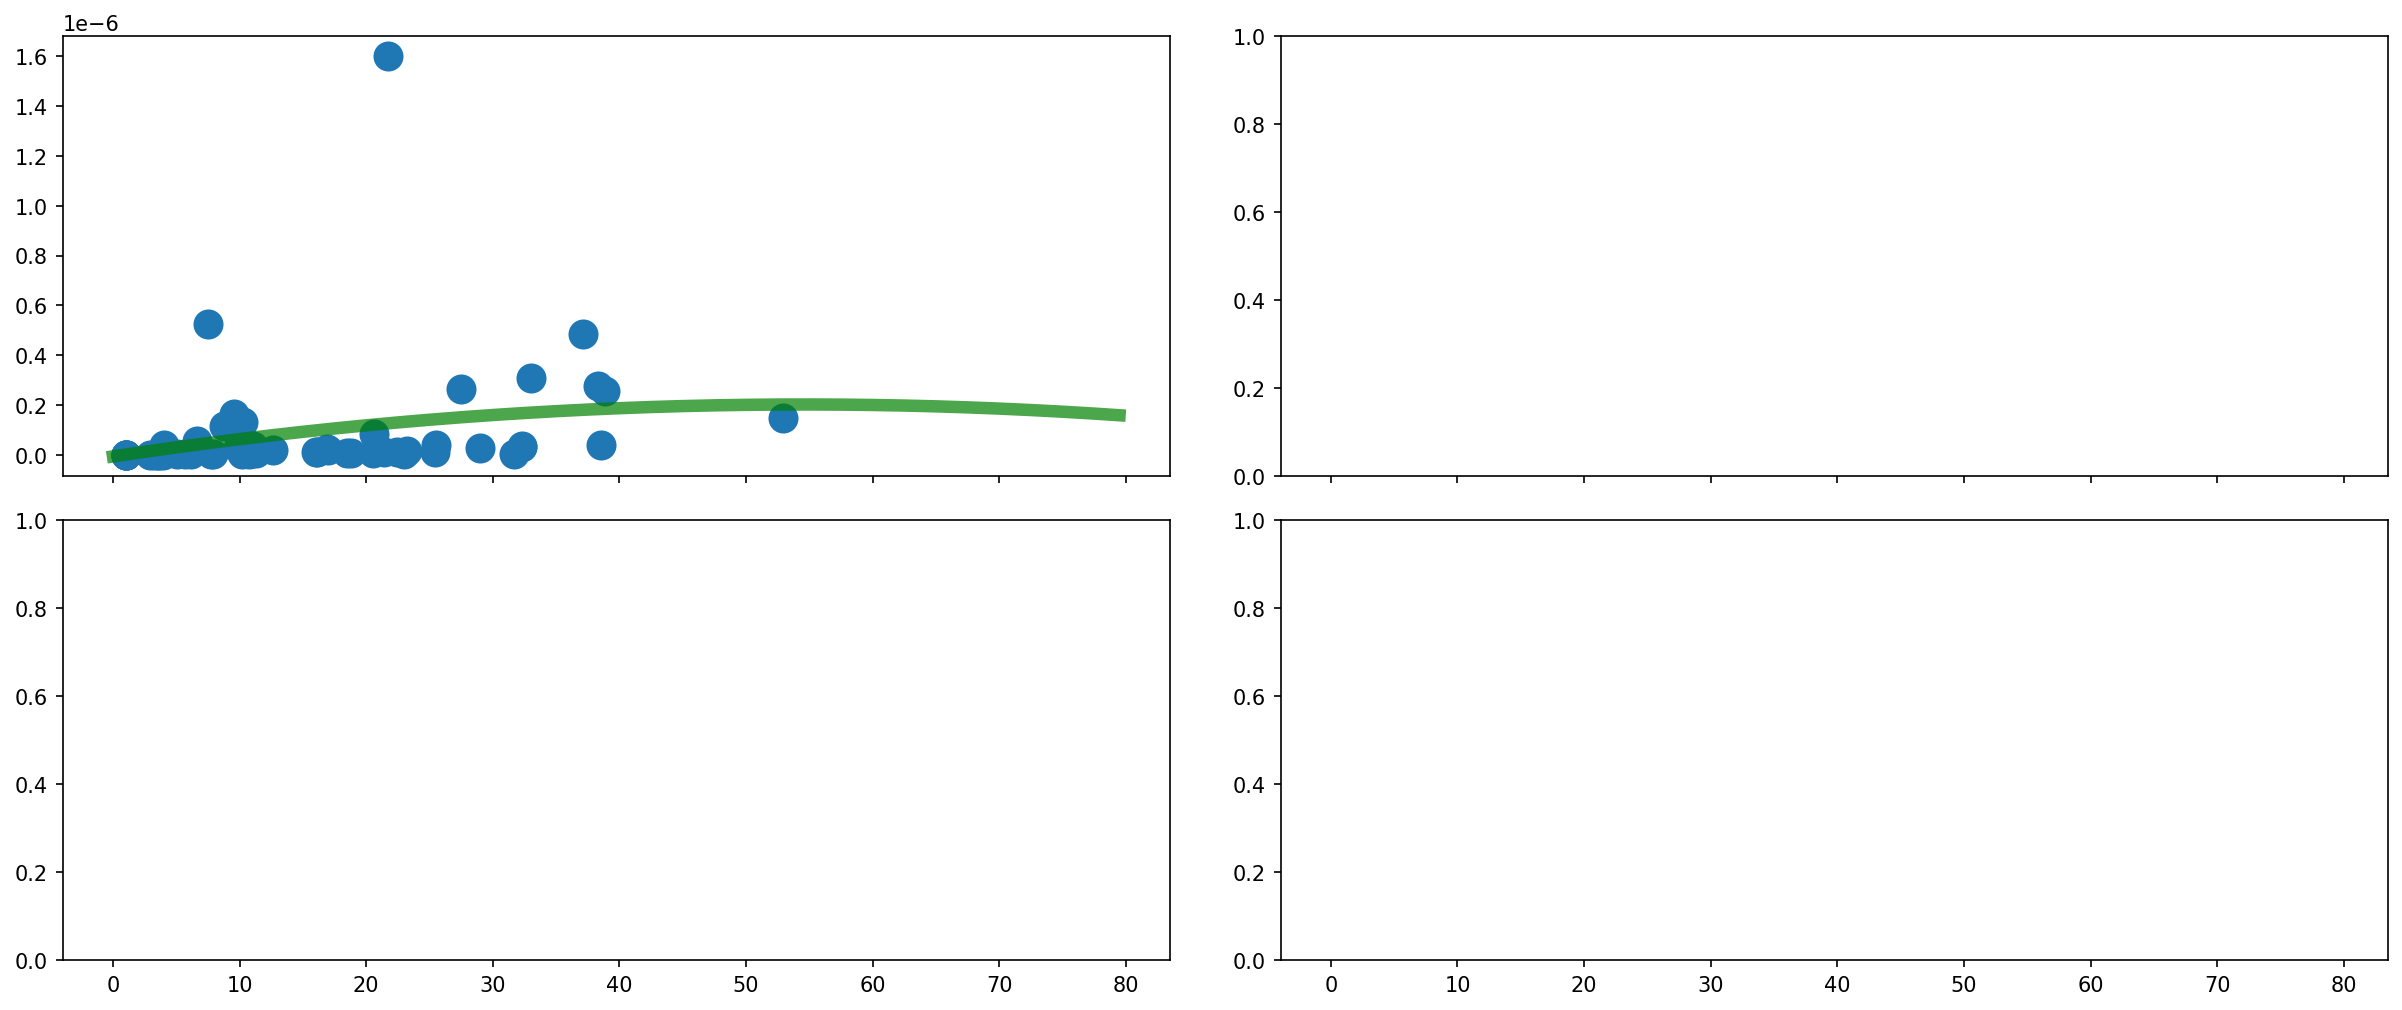

In [26]:
# Plot settings
fig10, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(20, 8))
fig10.subplots_adjust(hspace=0.1)
fig10.subplots_adjust(wspace=0.1)
lw = 6
a = 0.7
ss = 180
ms = 12
yl=1.5
cc_ = np.arange(0, 80, 0.5)
cec_ = np.arange(0.1, 35, 0.5)

########################### Calculating epirical pedotransfer functions #####################################

fit2_clay_Klf = np.polyfit(np.array(df.Clay[:], dtype=float), np.array(df.Klf_IP[:], dtype=float), 2)
pred2_clay_Klf = fit2_clay_Klf[-1] + fit2_clay_Klf[-2]*cc_ + fit2_clay_Klf[-3]*cc_*cc_
pred2r2_clay_Klf =       r2_score(df.Klf_IP[:], fit2_clay_Klf[-1] + fit2_clay_Klf[-2]*df.Clay[:] + fit2_clay_Klf[-3]*df.Clay[:]*df.Clay[:])

#fit_cec_alpha_lg = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.Alpha[:], dtype=float), 1)
#print("logarithmic coefficients for CEC vs alpha =", fit_cec_alpha_lg)
#predlg_cec_alpha =     fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(cec_)
#r2_cec_alpha_lg =       r2_score(ds.Alpha[:], fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(np.array(ds.CEC[:]).astype(float)))


########################### Plotting data and empirical pedotransfer functions #####################################

colors = ['navy', 'firebrick', 'wheat', 'indianred', 'darkorange', 'blue', 'violet', 'cornflowerblue', 'sandybrown','sandybrown']

ax1.plot(   cc_,                 pred2_clay_Klf, c='g',  linewidth=lw,   alpha=a, label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_Klf)))
ax1.scatter(df.Clay[:], df.Klf_IP[:], s=ss)

#ax2.plot(   cec_,                 predlg_cec_alpha, c='r', alpha=a,  linewidth=lw,   label='Eq. 30, ${R^2}=$  '+str("{:.2f}".format(r2_cec_alpha_lg)))
#ax2.scatter(ds.CEC[:], ds.Alpha[:],  c=colors,    s=ss)

#ax3.plot(   cc_,                 pred2_clay_m, c='g',  alpha=a,  linewidth=lw,  label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_m)))
#ax3.scatter(ds.Clay[:], ds.m_linde[:], c=colors, s=ss)

#ax4.plot(   cec_,                 predlg_cec_m, c='r', alpha=a,  linewidth=lw,   label='Eq. 31, ${R^2}=$  '+str("{:.2f}".format(r2_cec_m_lg)))
#ax4.scatter(ds.CEC[:], ds.m_linde[:],  c=colors,  s=ss)

#plots.fig10(ax1, ax2, ax3, ax4)
#plt.savefig("fig10", dpi=400)

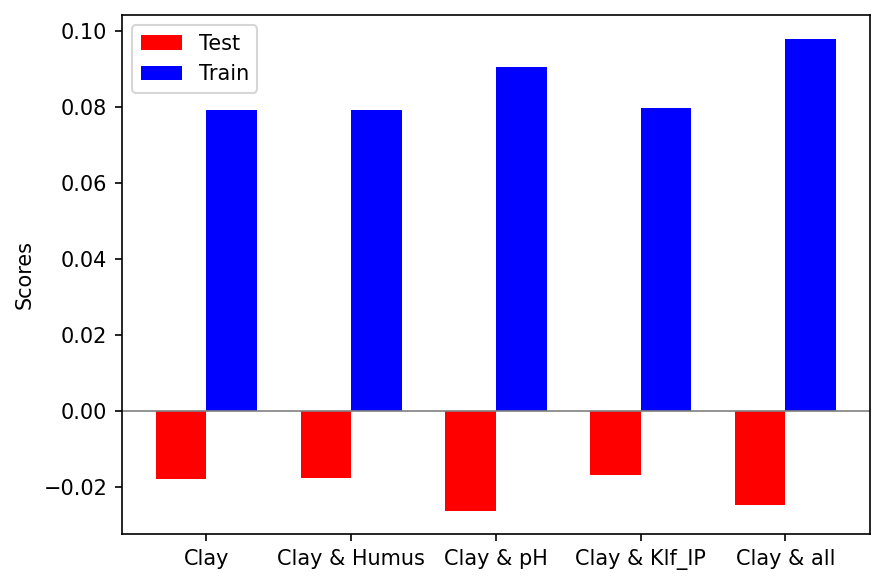

<Figure size 900x600 with 0 Axes>

In [27]:
np.set_printoptions(precision=2)

x_labels = ['Clay', 'Clay & Humus', 'Clay & pH', 'Clay & Klf_IP', 'Clay & all']

fig, ax = plt.subplots()
width = 0.35  # the width of the bars

x = np.arange(len(x_labels))
rects1 = ax.bar(x - width/2, test_errors_summary, width, color = 'red', label='Test')
rects2 = ax.bar(x + width/2, train_errors_summary, width, color = 'blue', label='Train')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_xticks(range(len(test_errors_summary)), x_labels)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
ax.legend()
fig.tight_layout()

plt.show()
plt.savefig("results_cec", dpi=200)

In [28]:
df['Clay_Klf_IP'] = df.Clay*df.Klf_IP
df['Clay_Klf_IP2'] = df.Clay*df.Klf_IP**2
df['Clay2_Klf_IP'] = (df.Clay**2)*df.Klf_IP
df['Clay2'] = df.Clay**2
df['Klf_IP'] = df.Klf_IP**2

#X = df[['Clay', 'Klf_IP', 'Clay_Klf_IP', 'Clay_Klf_IP2', 'Clay2_Klf_IP', 'Clay2', 'Klf_IP2']].values
X = df[['Clay', 'Khf_IP']].values

Y = df.CEC.values

RMSE_train_lin, RMSE_test_lin, R2_train_lin, R2_test_lin = [], [], [], []
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)
    
    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_test = LinReg.score(X_test, y_test) # Test set R²
    R2_train_lin.append(R_train)
    R2_test_lin.append(R_test)
    
    print('Training set RMSE: {}'.format(RMSE_train))
    print('Test set RMSE: {}'.format(RMSE_test))
    print('Train set R²: {}'.format(R_train))
    print('Test set R²: {}'.format(R_test))
print(np.mean(R2_test_lin), np.mean(R2_train_lin))   

#Training set RMSE: 3.022285912923456
#Test set RMSE: 4.017802330728136
#Train set R²: 0.8935174323290371
#Test set R²: 0.7738709519620385
#Training set RMSE: 3.404876396085658
#Test set RMSE: 3.172838452687782
#Train set R²: 0.8791276864909744
#Test set R²: 0.6723798296120083
#Training set RMSE: 3.248941032002272
#Test set RMSE: 3.459610422900905
#Train set R²: 0.8881211736555832
##Test set R²: 0.7690263066413321
#Training set RMSE: 2.8369899280128323
#Test set RMSE: 4.181771620967937
#Train set R²: 0.8860783885531048
#Test set R²: 0.7983812357432767
#Training set RMSE: 3.1827956147228984
#Test set RMSE: 3.5859881613105924
#Train set R²: 0.877983746760921
#Test set R²: 0.8310474277179148
#Training set RMSE: 3.2073424775464416
#Test set RMSE: 3.5872123237748545
#Train set R²: 0.8879155405936033
#Test set R²: 0.7629969597940292
#Training set RMSE: 3.136181309045139
#...
#Test set RMSE: 3.222330941037536
#Train set R²: 0.84567195366127
#Test set R²: 0.8925424955338384
#0.8170026100801969 0.8691467074127178

Training set RMSE: 3.054534418820611
Test set RMSE: 4.068382959713376
Train set R²: 0.8970751692211731
Test set R²: 0.8155379679893303
Training set RMSE: 2.9101599879206757
Test set RMSE: 4.34403083317029
Train set R²: 0.88249390788388
Test set R²: 0.8601206462104484
Training set RMSE: 3.37985656620812
Test set RMSE: 3.4952704589958743
Train set R²: 0.8893402473874263
Test set R²: 0.8050364542902986
Training set RMSE: 3.6794102723594433
Test set RMSE: 2.6250153603803783
Train set R²: 0.876824881125503
Test set R²: 0.8395011324238629
Training set RMSE: 3.3064799230316058
Test set RMSE: 3.5453228886187005
Train set R²: 0.8896771336020588
Test set R²: 0.823928405999834
Training set RMSE: 3.0506831946468176
Test set RMSE: 4.016966099621659
Train set R²: 0.900783524950058
Test set R²: 0.8027164935810873
Training set RMSE: 3.588815475807001
Test set RMSE: 2.9553328216486996
Train set R²: 0.8871432531262664
Test set R²: 0.730880520755737
Training set RMSE: 3.2275267178167524
Test set RMSE: 3.

KeyError: "['Kre_F1'] not in index"

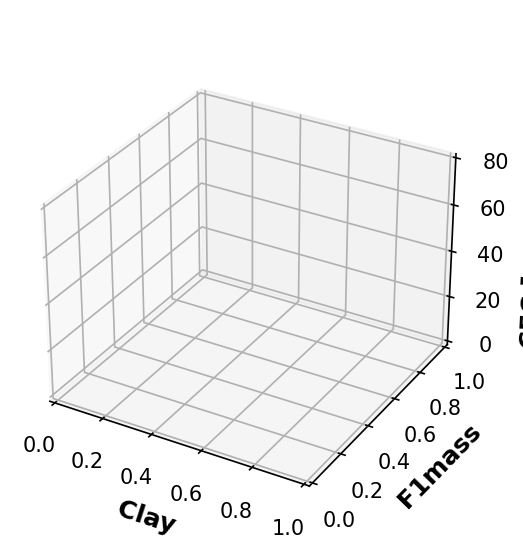

In [29]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")
ThreeD1(axa, plt)

s_array_2 = df[['Clay', 'Klf_IP']].to_numpy()
s_array_1 = df[['Clay']].to_numpy()
s_array_4 = df[['Clay', 'Khf_IP']].to_numpy()
s_array_3 = df[['Clay', 'Kre_F1']].to_numpy()
s_array_5 = df[['Clay', 'kfd_abs']].to_numpy()

reg = LinearRegression().fit(s_array_1, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_1) - df.CEC)**2)))
print(reg.score(s_array_1, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_2, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_2) - df.CEC)**2)))
print(reg.score(s_array_2, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_3, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_3) - df.CEC)**2)))
print(reg.score(s_array_3, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_4, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_4) - df.CEC)**2)))
print(reg.score(s_array_4, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


reg = LinearRegression().fit(s_array_5, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_5) - df.CEC)**2)))
print(reg.score(s_array_5, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cec = np.linspace(0, 80, 80)
clay_ = np.linspace(0, 60, 100)
Klf_IP_ = np.linspace(0, 20, 36000)


#cec_banin_amiel = ptf.Banin_Amiel3(X, Y)
#print(cec_banin_amiel)

#cec_IOPped = ptf.IOPped(X, Y)
#print(cec_IOPped)

axa.scatter(df.Clay, df.Klf_IP, df.CEC,  c = "navy", s = 15)
#axa.plot_surface(X, Y, cec_banin_amiel)
#axa.plot_surface(X, Y, cec_IOPped)

# 3.7823879857794247
#0.8244485921101703
#coefficients of equation of plane, (a1, a2):  [0.69951124]
#value of intercept, c: -0.31636207523237303
#3.2909243877488357
#0.8671052042172538
#coefficients of equation of plane, (a1, a2):  [7.03183750e-01 2.09870927e-04]
#value of intercept, c: -1.1995562919773022
#3.245883919970006
#0.8707179783253766
#coefficients of equation of plane, (a1, a2):  [  0.70952958 156.59957818]
#value of intercept, c: -1.35582010337788
#3.2893951887138067
#0.8672286803921219
#coefficients of equation of plane, (a1, a2):  [7.03535789e-01 2.26413155e-04]
#value of intercept, c: -1.2071061393477702
#3.3164995225940426
#0.8650316171822411
#coefficients of equation of plane, (a1, a2):  [0.69872723 0.00283705]
#value of intercept, c: -1.0940549778128847